# Assignment 1: Wine Quality Classification using K-Nearest Neighbours
Using kNN for classification of [wine quality dataset](https://www.kaggle.com/shelvigarg/wine-quality-dataset/).

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## 2. Import dataset & Exploratory Data Analysis

Load the dataset & check the size.

In [2]:
df = pd.read_csv("dataset/winequalityN.csv")
df.shape

(6497, 13)

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Check if there are null values in the dataset, and remove them.

In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df['quality'].value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

## 3. Build & train model

- The 'type' is not a number variable so we transform it.
- Also consider that a quality above 5 is good, and lesser than 5 is bad, so we will create a new feature according to this.

In [7]:
Y=df['quality'].apply(lambda x: 1 if x > 5 else 0 )
X=df.drop(['quality'], axis=1)
X['type'] = X['type'].apply(lambda x: 1 if x == 'white' else 10)

Train-test split.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

Tune the hyperparameter 'k', then calculate the accuracy & error.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Y=[]

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    KNN=knn.fit(X_train,Y_train)
    prediction=KNN.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test,prediction)
    print("K={} accuracy: {}".format(i, accuracy))
    Y.append(1 - accuracy)   

K=1 accuracy: 0.731631863882444
K=2 accuracy: 0.6566125290023201
K=3 accuracy: 0.703016241299304
K=4 accuracy: 0.671307037896365
K=5 accuracy: 0.6906419180201083
K=6 accuracy: 0.6867749419953596
K=7 accuracy: 0.6952822892498066
K=8 accuracy: 0.7014694508894045
K=9 accuracy: 0.6991492652745553
K=10 accuracy: 0.6952822892498066
K=11 accuracy: 0.6952822892498066
K=12 accuracy: 0.6952822892498066
K=13 accuracy: 0.6875483372003094
K=14 accuracy: 0.6790409899458624
K=15 accuracy: 0.6821345707656613
K=16 accuracy: 0.682907965970611
K=17 accuracy: 0.6774941995359629
K=18 accuracy: 0.6844547563805105
K=19 accuracy: 0.6867749419953596


## Results
As shown in Figure1 below, the model is most accurate(has least error) when k=1.

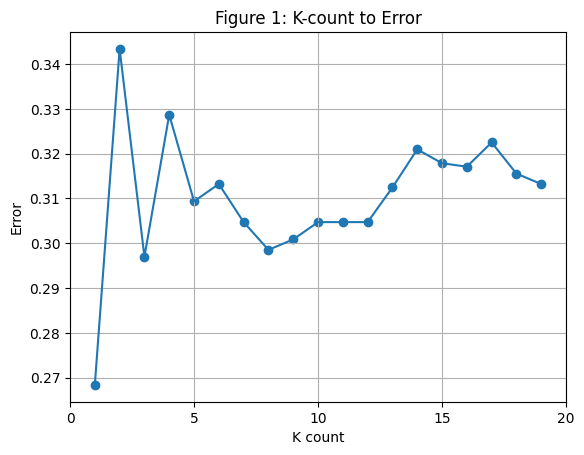

In [10]:
X = range(1, 20)
plt.scatter(X, Y)
plt.plot(X, Y)
plt.xlabel("K count")
plt.ylabel("Error")
plt.grid()
plt.xticks([0,5,10,15,20])
plt.title("Figure 1: K-count to Error")
plt.show()

Hence using k=1, we will classify the wines in the dataset by their quality. The accuracy of the model = 0.731631863882444

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)
KNN=knn.fit(X_train,Y_train)
prediction=KNN.predict(X_test)
accuracy = metrics.accuracy_score(Y_test,prediction)
print(prediction)
print("Accuracy:",accuracy)


[0 1 0 ... 1 1 0]
Accuracy: 0.731631863882444
